In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Neon4\anconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Datasets loaded 

In [2]:
confirmed_case=pd.read_csv(r"C:\Users\Neon4\Downloads\time_series_covid19_confirmed_global.csv")
death_case=pd.read_csv(r"C:\Users\Neon4\Downloads\time_series_covid19_deaths_global.csv")
recovered_case=pd.read_csv(r"C:\Users\Neon4\Downloads\time_series_covid19_confirmed_global.csv")

In [3]:
confirmed_case

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


# Data Cleaning

In [4]:
confirmed_case = confirmed_case.groupby('Country/Region').sum().reset_index()
death_case = death_case.groupby('Country/Region').sum().reset_index()
recovered_case = recovered_case.groupby('Country/Region').sum().reset_index()

In [5]:
confirmed_case['case_type']='confirmed'
death_case['case_type']='death'
recovered_case['case_type']='recovered'

In [6]:
confirmed_case=confirmed_case.drop('Province/State',axis=1)
death_case=death_case.drop('Province/State',axis=1)
recovered_case=recovered_case.drop('Province/State',axis=1)

In [7]:
df=pd.concat([confirmed_case,death_case,recovered_case],axis=0,ignore_index=True)

In [8]:
df

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,case_type
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,confirmed
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,confirmed
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,confirmed
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,confirmed
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,recovered
599,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,recovered
600,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,recovered
601,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,...,343012,343079,343079,343079,343135,343135,343135,343135,343135,recovered


In [9]:
df=df.drop(['Lat','Long'],axis=1)


In [10]:
data = df.melt(id_vars=['Country/Region', 'case_type'], var_name='Date', value_name='Cases')

In [11]:
data

,Country/Region,case_type,Date,Cases
0,Afghanistan,confirmed,1/22/20,0
1,Albania,confirmed,1/22/20,0
2,Algeria,confirmed,1/22/20,0
3,Andorra,confirmed,1/22/20,0
4,Angola,confirmed,1/22/20,0
...,...,...,...,...
689224,West Bank and Gaza,recovered,3/9/23,703228
689225,Winter Olympics 2022,recovered,3/9/23,535
689226,Yemen,recovered,3/9/23,11945
689227,Zambia,recovered,3/9/23,343135


In [12]:
data['Date']=pd.to_datetime(data['Date'])

In [13]:
data['Cases']=data['Cases'].astype(int)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689229 entries, 0 to 689228
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Country/Region  689229 non-null  object        
 1   case_type       689229 non-null  object        
 2   Date            689229 non-null  datetime64[ns]
 3   Cases           689229 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 18.4+ MB


In [15]:
data = data.reset_index(drop=True)
data


,Country/Region,case_type,Date,Cases
0,Afghanistan,confirmed,2020-01-22,0
1,Albania,confirmed,2020-01-22,0
2,Algeria,confirmed,2020-01-22,0
3,Andorra,confirmed,2020-01-22,0
4,Angola,confirmed,2020-01-22,0
...,...,...,...,...
689224,West Bank and Gaza,recovered,2023-03-09,703228
689225,Winter Olympics 2022,recovered,2023-03-09,535
689226,Yemen,recovered,2023-03-09,11945
689227,Zambia,recovered,2023-03-09,343135


In [16]:
df_pivot = data.pivot_table(index=['Date', 'Country/Region'], columns='case_type', values='Cases', fill_value=0).reset_index()


In [17]:
df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])
df_pivot = df_pivot.sort_values(by='Date')


In [18]:
df_pivot

case_type,Date,Country/Region,confirmed,death,recovered
0,2020-01-22,Afghanistan,0.0,0.0,0.0
128,2020-01-22,Netherlands,0.0,0.0,0.0
129,2020-01-22,New Zealand,0.0,0.0,0.0
130,2020-01-22,Nicaragua,0.0,0.0,0.0
131,2020-01-22,Niger,0.0,0.0,0.0
...,...,...,...,...,...
229612,2023-03-09,Grenada,19680.0,238.0,19680.0
229613,2023-03-09,Guatemala,1238247.0,20182.0,1238247.0
229614,2023-03-09,Guinea,38267.0,467.0,38267.0
229604,2023-03-09,Finland,1463644.0,8967.0,1463644.0


# Feature Engineering

In [19]:
df_pivot['year'] =df_pivot['Date'].dt.year
df_pivot['month'] = df_pivot['Date'].dt.month
df_pivot['day'] = df_pivot['Date'].dt.day
df_pivot['day_of_week'] = df_pivot['Date'].dt.dayofweek

In [20]:
df_pivot

case_type,Date,Country/Region,confirmed,death,recovered,year,month,day,day_of_week
0,2020-01-22,Afghanistan,0.0,0.0,0.0,2020,1,22,2
128,2020-01-22,Netherlands,0.0,0.0,0.0,2020,1,22,2
129,2020-01-22,New Zealand,0.0,0.0,0.0,2020,1,22,2
130,2020-01-22,Nicaragua,0.0,0.0,0.0,2020,1,22,2
131,2020-01-22,Niger,0.0,0.0,0.0,2020,1,22,2
...,...,...,...,...,...,...,...,...,...
229612,2023-03-09,Grenada,19680.0,238.0,19680.0,2023,3,9,3
229613,2023-03-09,Guatemala,1238247.0,20182.0,1238247.0,2023,3,9,3
229614,2023-03-09,Guinea,38267.0,467.0,38267.0,2023,3,9,3
229604,2023-03-09,Finland,1463644.0,8967.0,1463644.0,2023,3,9,3


In [50]:
df_pivot['lag_1'] = df_pivot.groupby('Country/Region')['confirmed'].shift(1)
df_pivot['lag_2'] = df_pivot.groupby('Country/Region')['confirmed'].shift(30)
df_pivot['lag_3'] = df_pivot.groupby('Country/Region')['confirmed'].shift(90)


In [51]:
df_pivot=df_pivot.dropna().reset_index(drop=True)

In [52]:
df_pivot

case_type,Date,Country/Region,confirmed,death,recovered,year,month,day,day_of_week,lag_1,lag_2,lag_3,recovery_rate
0,2020-05-06,Pakistan,24644.0,585.0,24644.0,2020,5,6,2,24073.0,4035.0,0.0,1.0
1,2020-05-06,Netherlands,41973.0,5221.0,41973.0,2020,5,6,2,41518.0,19703.0,0.0,1.0
2,2020-05-06,New Zealand,1489.0,21.0,1489.0,2020,5,6,2,1488.0,1106.0,0.0,1.0
3,2020-05-06,Nicaragua,15.0,5.0,15.0,2020,5,6,2,15.0,5.0,0.0,1.0
4,2020-05-06,Niger,770.0,38.0,770.0,2020,5,6,2,763.0,253.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208633,2023-03-09,Grenada,19680.0,238.0,19680.0,2023,3,9,3,19680.0,19680.0,19636.0,1.0
208634,2023-03-09,Guatemala,1238247.0,20182.0,1238247.0,2023,3,9,3,1238049.0,1230098.0,1168635.0,1.0
208635,2023-03-09,Guinea,38267.0,467.0,38267.0,2023,3,9,3,38267.0,38240.0,38153.0,1.0
208636,2023-03-09,Finland,1463644.0,8967.0,1463644.0,2023,3,9,3,1462976.0,1459198.0,1417909.0,1.0


In [53]:
total_confirmed_cases = df_pivot['confirmed'].sum()
total_deaths = df_pivot['death'].sum()
total_recoveries = df_pivot['recovered'].sum()

In [54]:
print('Total confirmed cases across all world :',total_confirmed_cases)
print('Total deaths cases across all world :',total_deaths)
print('Total recoviers cases across all world :',total_recoveries)

Total confirmed cases across all world : 316818410766.0
Total deaths cases across all world : 4413347442.0
Total recoviers cases across all world : 316818410766.0


In [55]:
country_summary = df_pivot.groupby('Country/Region')[['confirmed', 'death', 'recovered']].max()
country_summary.head()


case_type,confirmed,death,recovered
Country/Region,,,
Afghanistan,209451.0,7896.0,209451.0
Albania,334457.0,3598.0,334457.0
Algeria,271496.0,6881.0,271496.0
Andorra,47890.0,165.0,47890.0
Angola,105288.0,1933.0,105288.0


In [56]:
top_5_countries_most_confirmed = country_summary.sort_values(by='confirmed', ascending=False).head(5)
top_5_countries_most_confirmed

case_type,confirmed,death,recovered
Country/Region,,,
US,103802702.0,1123836.0,103802702.0
India,44690738.0,530779.0,44690738.0
France,39866718.0,166176.0,39866718.0
Germany,38249060.0,168935.0,38249060.0
Brazil,37081209.0,699276.0,37081209.0


In [57]:
top_5_countries_most_death = country_summary.sort_values(by='death', ascending=False).head(5)
top_5_countries_most_death

case_type,confirmed,death,recovered
Country/Region,,,
US,103802702.0,1123836.0,103802702.0
Brazil,37081209.0,699276.0,37081209.0
India,44690738.0,530779.0,44690738.0
Russia,22075858.0,388478.0,22075858.0
Mexico,7483444.0,333188.0,7483444.0


In [58]:
top_5_countries_most_recovered = country_summary.sort_values(by='recovered', ascending=False).head(5)
top_5_countries_most_recovered

case_type,confirmed,death,recovered
Country/Region,,,
US,103802702.0,1123836.0,103802702.0
India,44690738.0,530779.0,44690738.0
France,39866718.0,166176.0,39866718.0
Germany,38249060.0,168935.0,38249060.0
Brazil,37081209.0,699276.0,37081209.0


In [64]:
country_summary['mortality_rate'] = (country_summary['death'] / country_summary['confirmed'].replace(0, pd.NA)) * 100
country_summary

case_type,confirmed,death,recovered,mortality_rate
Country/Region,,,,
Afghanistan,209451.0,7896.0,209451.0,3.769855
Albania,334457.0,3598.0,334457.0,1.075774
Algeria,271496.0,6881.0,271496.0,2.534476
Andorra,47890.0,165.0,47890.0,0.344540
Angola,105288.0,1933.0,105288.0,1.835917
...,...,...,...,...
West Bank and Gaza,703228.0,5708.0,703228.0,0.811686
Winter Olympics 2022,535.0,0.0,535.0,0.000000
Yemen,11945.0,2159.0,11945.0,18.074508


In [65]:
top_5_countries_most_mortality_rate = country_summary.sort_values(by='mortality_rate', ascending=False).head(5)
top_5_countries_most_mortality_rate

case_type,confirmed,death,recovered,mortality_rate
Country/Region,,,,
"Korea, North",1.0,6.0,1.0,600.000000
MS Zaandam,9.0,2.0,9.0,22.222222
Yemen,11945.0,2159.0,11945.0,18.074508
Sudan,63829.0,5017.0,63829.0,7.860064
Syria,57467.0,3164.0,57467.0,5.505769


In [59]:
df_pivot['recovery_rate'] = df_pivot['recovered'] / df_pivot['confirmed'].replace(0, 1)  # Avoid division by zero
country_recovery_rates = df_pivot.groupby('Country/Region')['recovery_rate'].mean()
country_recovery_rates

Country/Region
Afghanistan             1.000000
Albania                 1.000000
Algeria                 1.000000
Andorra                 1.000000
Angola                  1.000000
                          ...   
West Bank and Gaza      1.000000
Winter Olympics 2022    0.395954
Yemen                   1.000000
Zambia                  1.000000
Zimbabwe                1.000000
Name: recovery_rate, Length: 201, dtype: float64

In [60]:
df_lags = df_pivot[['confirmed', 'lag_1', 'lag_2', 'lag_3']].dropna()
correlations = df_lags.corr()

In [61]:
correlations

case_type,confirmed,lag_1,lag_2,lag_3
case_type,,,,
confirmed,1.000000,0.999996,0.997509,0.984785
lag_1,0.999996,1.000000,0.997653,0.985014
lag_2,0.997509,0.997653,1.000000,0.991391
lag_3,0.984785,0.985014,0.991391,1.000000


# Model_training

In [79]:
df_india=df_pivot[df_pivot['Country/Region']=='India'].drop(['Country/Region','death','recovered','Date'],axis=1)

In [80]:
df_india

case_type,confirmed,year,month,day,day_of_week,lag_1,lag_2,lag_3
155,3.0,2020,2,6,3,1.0,0.0,0.0
356,3.0,2020,2,7,4,2.0,0.0,0.0
558,3.0,2020,2,8,5,3.0,0.0,0.0
759,3.0,2020,2,9,6,3.0,1.0,0.0
845,3.0,2020,2,10,0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...
225766,44689327.0,2023,3,5,6,44687837.0,44686842.0,44686143.0
226080,44689593.0,2023,3,6,0,44688105.0,44687025.0,44686263.0
226160,44689919.0,2023,3,7,1,44688388.0,44687243.0,44686358.0
226368,44690298.0,2023,3,8,2,44688722.0,44687428.0,44686483.0


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

In [112]:
MN=MinMaxScaler()

In [113]:
X = df_india[['year', 'month', 'day', 'day_of_week', 'lag_1', 'lag_2', 'lag_3']]
y = df_india['confirmed']

In [114]:
x_scaled=MN.fit_transform(X[['lag_1','lag_2','lag_3']])

In [115]:
x_scaled=pd.DataFrame(x_scaled,columns=['lag_1','lag_2','lag_3'])

In [132]:
df_india[['year', 'month', 'day', 'day_of_week']].reset_index()

case_type,index,year,month,day,day_of_week
0,155,2020,2,6,3
1,356,2020,2,7,4
2,558,2020,2,8,5
3,759,2020,2,9,6
4,845,2020,2,10,0
...,...,...,...,...,...
1123,225766,2023,3,5,6
1124,226080,2023,3,6,0
1125,226160,2023,3,7,1
1126,226368,2023,3,8,2


In [133]:
x=pd.concat([df_india[['year', 'month', 'day', 'day_of_week']].reset_index(),x_scaled],axis=1,ignore_index=True)

In [134]:
x.shape

(1128, 8)

In [135]:
y.shape

(1128,)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [137]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae', random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mae', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [138]:
y_pred_xgb = xgb_model.predict(X_test)
print('XGBoost Mean Absolute Error:', mean_absolute_error(y_test, y_pred_xgb))
print('XGBoost mean_squared_error:', mean_squared_error(y_test, y_pred_xgb))
print('XGBoost r2_score:', r2_score(y_test, y_pred_xgb))


XGBoost Mean Absolute Error: 70146.62756742629
XGBoost mean_squared_error: 25809924869.597534
XGBoost r2_score: 0.9999157560578833


In [139]:
results_xgb = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_xgb})

# Sort the DataFrame by the actual values
results_xgb = results_xgb.sort_values(by='Actual').reset_index(drop=True)

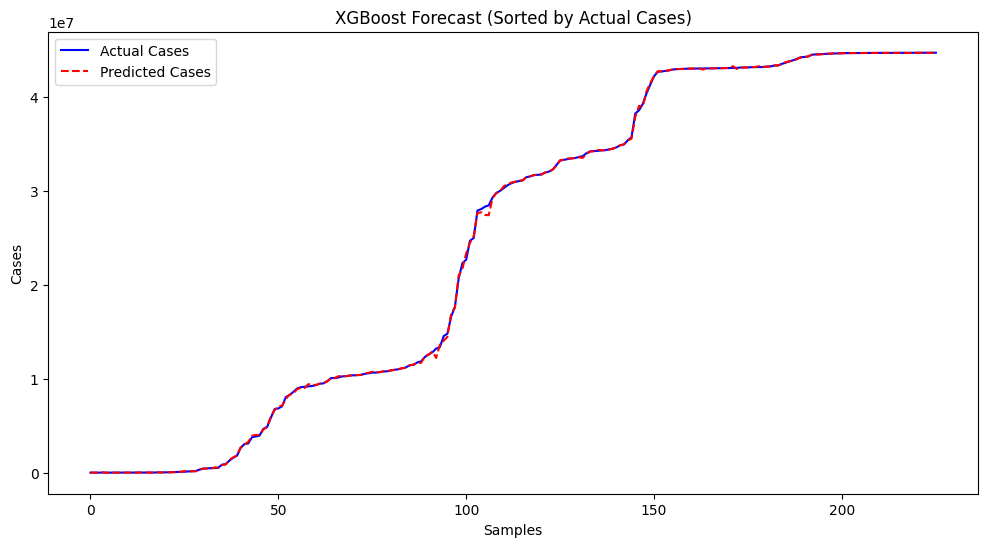

In [140]:
plt.figure(figsize=(12, 6))
plt.plot(results_xgb.index, results_xgb['Actual'], label='Actual Cases', color='blue', linestyle='-')
plt.plot(results_xgb.index, results_xgb['Predicted'], label='Predicted Cases', color='red', linestyle='--')
plt.title('XGBoost Forecast (Sorted by Actual Cases)')
plt.xlabel('Samples')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [146]:
results_xgb = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_xgb})

# Sort the DataFrame by the actual values
results_xgb = results_xgb.sort_values(by='Actual').reset_index(drop=True)

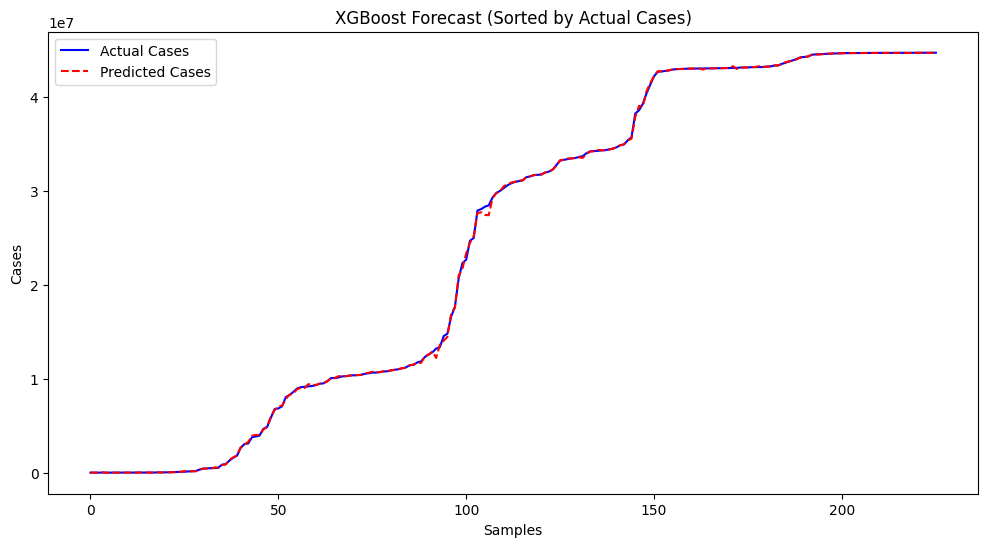

In [147]:
plt.figure(figsize=(12, 6))
plt.plot(results_xgb.index, results_xgb['Actual'], label='Actual Cases', color='blue', linestyle='-')
plt.plot(results_xgb.index, results_xgb['Predicted'], label='Predicted Cases', color='red', linestyle='--')
plt.title('XGBoost Forecast (Sorted by Actual Cases)')
plt.xlabel('Samples')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [154]:
from sklearn.model_selection import GridSearchCV


In [155]:
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


In [156]:
xgb_tuned = xgb.XGBRegressor(objective='reg:squarederror')


In [157]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)


In [159]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric='mae',
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_ca...
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=42,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [161]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Mean Squared Error:", mean_squared_error(y_test, y_pred))


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best Score: 14190097049.432707
Test Mean Squared Error: 11762527291.236263


In [162]:
r2=r2_score(y_test, y_pred)

In [171]:
n = len(y_test)
p=5

r2_adj = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

In [172]:
r2_adj

0.9999607343833663